In [1]:
import statistics
import random
import matplotlib.pyplot as plt
# import seaborn
import re
import math


font = {'size'   : 12}

loc = "/home/phoebe/Dropbox/Stuff1819/proooject/diss/graphs"


plt.rc('font', **font)



plt.rc('text', usetex=True)

In [2]:
# 12 queens

test1_pho=[26.6, 26.51, 26.07, 26.47, 26.14]
test1_swi=[7.91, 7.77, 7.70, 7.69, 7.76]
test1_gnu=[20.58/10, 20.85/10, 21.44/10, 20.45/10, 20.43/10]


print(statistics.mean(test1_pho)/statistics.mean(test1_swi))

print(statistics.mean(test1_pho)/statistics.mean(test1_gnu))



3.394025238217873
12.702650602409637


In [3]:
# quick5000 

test2_pho = [29.77, 30.05, 29.67, 30.36, 29.61]
test2_swi = [8.29, 8.45, 8.35, 8.35, 8.36]
test2_gnu = [0,0,0,0,0] #notreally, failure occured



print(statistics.mean(test2_pho)/statistics.mean(test2_swi))



# print(statistics.mean(test2_pho)/statistics.mean(test2_gnu))


3.575598086124402


In [4]:
# hannoi_pho = [1.14, 1.13, 1.08, 1.11, 1.30]
# hannoi_swi = [28.00, 27.69, 28.47, 29.18, 29.82]
# hannoi_gnu = [3.00/100, 3.03/100, 2.53/100, 2.86/100, 2.74/100]


hannoi_pho = [0.36, 0.33, 0.36, 0.35, 0.34]
hannoi_swi = [25.94, 25.74, 25.75, 25.74, 26.56]
hannoi_gnu = [2.27/100, 2.35/100, 2.32/100, 2.25/100, 2.29/100]


print(statistics.mean(hannoi_swi)/statistics.mean(hannoi_pho))

print(statistics.mean(hannoi_pho)/statistics.mean(hannoi_gnu))


74.55747126436782
15.156794425087107


In [5]:
col_pho = [4.49, 4.55, 4.42, 4.42, 4.51]
col_swi = [0.42, 0.41, 0.42, 0.40, 0.43]
col_gnu = [16.31/100, 16.06/100, 16.02/100, 15.91/100, 16.05/100]

print(statistics.mean(col_pho)/statistics.mean(col_swi))

print(statistics.mean(col_pho)/statistics.mean(col_gnu))


10.764423076923077
27.86558805227131


In [6]:
ack_pho=[0.89, 0.91, 0.90, 0.92, 0.92]
ack_swi=[75.04, 75.77, 75.13, 74.75, 76.01]
ack_gnu=[7.31/100, 7.36/100, 7.27/100, 7.21/100, 7.33/100]

print(statistics.mean(ack_swi)/statistics.mean(ack_pho))

print(statistics.mean(ack_pho)/statistics.mean(ack_gnu))


82.97356828193833
12.445175438596491


In [7]:
iter_pho = [20.28, 20.25, 20.42, 20.30, 20.05]
iter_swi = [2.09, 2.16, 2.12, 2.15, 2.09]
iter_gnu = [11.82/10, 11.91/10, 11.77/10, 11.82/10, 11.77/10]

print(statistics.mean(iter_pho)/statistics.mean(iter_swi))

print(statistics.mean(iter_pho)/statistics.mean(iter_gnu))


9.547596606974553
17.14334066677949


<BarContainer object of 3 artists>


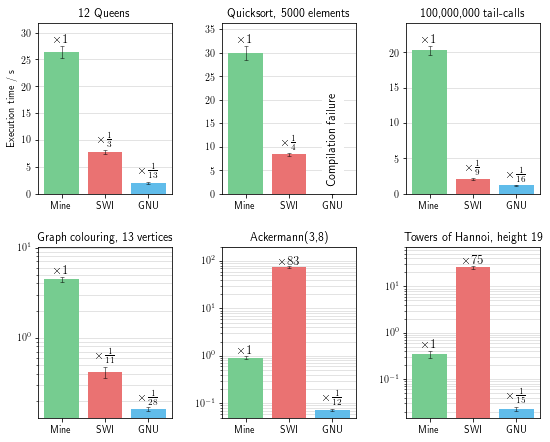

In [8]:
f, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2, 3,figsize=(8, 6.5))



f.tight_layout()

def bar(means, labels, err, ax, title,log,label,blabels):
    x_coords = list(range(1, len(means)+1))
    ax.grid(axis='y',which='both',zorder=0, color='#dddddd')
    ax.set_axisbelow(True)
    
    pl = ax.bar(x_coords, means,
                yerr=err,color=['#76cc90', '#ea7272','#60bcea'],
                tick_label=labels,error_kw=dict(lw=0.5, capsize=2, capthick=0.5),
               )
   # ax.bar(x_coords, means,yerr=err,capsize=6,color="Spectral",tick_label=labels)
    ax.set_title(title)
    if log:
        ax.set_yscale('log')
    ax.set_ylabel(label)
#     ax.set_xlim([0.6,4.1])
    
    [a,b] = ax.get_ylim()
    if log: 
        ax.set_ylim([a,b*1.8])
    else:
        ax.set_ylim([a,b*1.1])
        
    count = 0
    for idx,rect in enumerate(pl):
        height = rect.get_height()
        if height == 0:
            continue
            
        [_,m] = ax.get_ylim()
        height = err[count] + means[count] 
        
        ax.text(rect.get_x() + 0.5 * rect.get_width(), 
#                 rect.get_y()+rect.get_height() + 0.1 + err[count],
                height,
                blabels[count],
                ha='center', va='bottom', size=13)    
        count += 1
    
    return pl
    
                
#     ax.xticks(x_coords, labels)

def bardata(pho, swi, gnu, axis, title,log,label,labels):
    means1 = [statistics.mean(x) for x in [pho, swi, gnu]]
    labels1 = ['Mine', 'SWI','GNU']
    err1 = [5 * statistics.stdev(x) for x in [pho, swi, gnu]]
    return bar(means1,labels1,err1, axis, title,log,label,labels)

bardata(test1_pho,test1_swi,test1_gnu,ax1,'12 Queens',False,'Execution time / s',[r'$\times 1$',r'$\times \frac{1}{3}$',r'$\times \frac{1}{13}$'])
p2 = bardata(test2_pho,test2_swi,test2_gnu,ax2,'Quicksort, 5000 elements',False,'',[r'$\times 1$',r'$\times \frac{1}{4}$',''])
bardata(col_pho,col_swi,col_gnu,ax4,'Graph colouring, 13 vertices',True,'',[r'$\times 1$',r'$\times \frac{1}{11} $',r'$\times \frac{1}{28}$'])
bardata(hannoi_pho,hannoi_swi,hannoi_gnu,ax6,'Towers of Hannoi, height 19',True,'',[r'$\times 1$',r'$\times 75$',r'$\times \frac{1}{15}$'])
bardata(ack_pho,ack_swi,ack_gnu,ax5,'Ackermann(3,8)',True,'',[r'$\times 1$',r'$\times 83$',r'$\times \frac{1}{12}$'])
bardata(iter_pho,iter_swi,iter_gnu,ax3,'100,000,000 tail-calls',False,'',[r'$\times 1$',r'$\times \frac{1}{9}$',r'$\times \frac{1}{16}$'])


print(p2)

# def autolabel(plot):
#     for idx,rect in enumerate(plot):
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 "hi",
#                 ha='center', va='bottom', rotation=90)

# autolabel(ax2)


# ax2.text(rect.get_x() + rect.get_width()/2., 1.05*height,"hi",ha='center', va='bottom')

def labelcompfail(plt,ax):
#     ax.set_xlim([0.6,3.4])
    count = 0
    for idx,rect in enumerate(plt):
        if count == 2:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.5,
                    "Compilation failure",
                    ha='center', va='bottom', rotation=90,size=12,backgroundcolor="white")
        count+=1

labelcompfail(p2,ax2)

f.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

f.savefig((loc + "/speed_comp_bar.png"),dpi=800)